# Convolutional Neural Networks

## Machine learning on images

In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Tensor Math

In [13]:
# 2 groups, of 3 groups, of 4 groups, of 5 elements
import random
random.seed(42)
A = np.random.randint(10, size=(2, 3, 4, 5))
B = np.random.randint(10, size=(2, 3))

In [14]:
A

array([[[[5, 2, 6, 9, 0],
         [1, 7, 0, 3, 9],
         [7, 8, 9, 9, 3],
         [8, 3, 9, 1, 8]],

        [[9, 2, 6, 0, 5],
         [5, 7, 4, 2, 4],
         [6, 0, 1, 3, 1],
         [9, 7, 7, 8, 5]],

        [[4, 9, 7, 1, 9],
         [2, 0, 8, 7, 9],
         [7, 1, 3, 7, 8],
         [1, 8, 3, 6, 3]]],


       [[[4, 6, 4, 4, 9],
         [6, 3, 7, 9, 0],
         [2, 0, 6, 6, 1],
         [2, 6, 4, 3, 1]],

        [[4, 6, 0, 6, 5],
         [1, 0, 1, 5, 3],
         [2, 9, 9, 6, 8],
         [6, 5, 0, 0, 1]],

        [[4, 1, 8, 9, 3],
         [2, 2, 2, 5, 6],
         [5, 5, 4, 1, 3],
         [1, 7, 2, 6, 9]]]])

In [6]:
A.flatten().shape

(120,)

In [8]:
A[0, 1, 0, 3]

8

In [7]:
B

array([[0, 0, 5],
       [0, 3, 1]])

#### A random colored image

In [15]:
img = np.random.randint(255, size=(4, 4, 3), dtype='uint8')
print(img, img.shape)

(array([[[  8,  89, 191],
        [ 37,  54,  55],
        [ 27, 252, 122],
        [ 24, 191, 234]],

       [[  8,  93,  64],
        [214, 224, 165],
        [ 50, 240, 196],
        [196,  19, 249]],

       [[205, 159,  15],
        [ 42,  18,  27],
        [109,  12, 230],
        [ 26, 148, 143]],

       [[215, 186, 118],
        [227, 139,  32],
        [248, 206, 112],
        [  8,  86,  70]]], dtype=uint8), (4, 4, 3))


In [17]:
img[:, : , 0]

array([[  8,  37,  27,  24],
       [  8, 214,  50, 196],
       [205,  42, 109,  26],
       [215, 227, 248,   8]], dtype=uint8)

Text(0.5,1,'Blue channel')

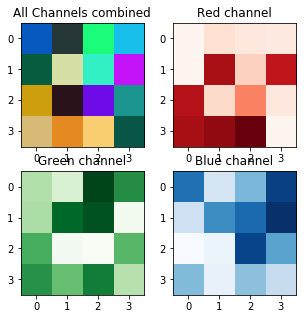

In [18]:
plt.figure(figsize=(5, 5))
plt.subplot(221)
plt.imshow(img)
plt.title("All Channels combined")

plt.subplot(222)
plt.imshow(img[:, : , 0], cmap='Reds')
plt.title("Red channel")

plt.subplot(223)
plt.imshow(img[:, : , 1], cmap='Greens')
plt.title("Green channel")

plt.subplot(224)
plt.imshow(img[:, : , 2], cmap='Blues')
plt.title("Blue channel")

### Tensor operations

In [19]:
2 * A

array([[[[10,  4, 12, 18,  0],
         [ 2, 14,  0,  6, 18],
         [14, 16, 18, 18,  6],
         [16,  6, 18,  2, 16]],

        [[18,  4, 12,  0, 10],
         [10, 14,  8,  4,  8],
         [12,  0,  2,  6,  2],
         [18, 14, 14, 16, 10]],

        [[ 8, 18, 14,  2, 18],
         [ 4,  0, 16, 14, 18],
         [14,  2,  6, 14, 16],
         [ 2, 16,  6, 12,  6]]],


       [[[ 8, 12,  8,  8, 18],
         [12,  6, 14, 18,  0],
         [ 4,  0, 12, 12,  2],
         [ 4, 12,  8,  6,  2]],

        [[ 8, 12,  0, 12, 10],
         [ 2,  0,  2, 10,  6],
         [ 4, 18, 18, 12, 16],
         [12, 10,  0,  0,  2]],

        [[ 8,  2, 16, 18,  6],
         [ 4,  4,  4, 10, 12],
         [10, 10,  8,  2,  6],
         [ 2, 14,  4, 12, 18]]]])

In [20]:
# element wise sum
A + A

array([[[[10,  4, 12, 18,  0],
         [ 2, 14,  0,  6, 18],
         [14, 16, 18, 18,  6],
         [16,  6, 18,  2, 16]],

        [[18,  4, 12,  0, 10],
         [10, 14,  8,  4,  8],
         [12,  0,  2,  6,  2],
         [18, 14, 14, 16, 10]],

        [[ 8, 18, 14,  2, 18],
         [ 4,  0, 16, 14, 18],
         [14,  2,  6, 14, 16],
         [ 2, 16,  6, 12,  6]]],


       [[[ 8, 12,  8,  8, 18],
         [12,  6, 14, 18,  0],
         [ 4,  0, 12, 12,  2],
         [ 4, 12,  8,  6,  2]],

        [[ 8, 12,  0, 12, 10],
         [ 2,  0,  2, 10,  6],
         [ 4, 18, 18, 12, 16],
         [12, 10,  0,  0,  2]],

        [[ 8,  2, 16, 18,  6],
         [ 4,  4,  4, 10, 12],
         [10, 10,  8,  2,  6],
         [ 2, 14,  4, 12, 18]]]])

In [21]:
B

array([[3, 0, 7],
       [7, 0, 4]])

In [22]:
A.shape

(2, 3, 4, 5)

In [23]:
B.shape

(2, 3)

In [25]:
# do a dot multiplication, and specify which axis we are contracting on
# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.tensordot.html 
np.tensordot(A, B, axes=([0, 1], [0, 1]))

array([[ 87, 115, 127,  98, 138],
       [ 67,  50, 113, 141, 114],
       [104,  51, 106, 122,  84],
       [ 49, 135,  84,  90,  88]])

In [26]:
np.tensordot(A, B, axes=([0], [0])).shape

(3, 4, 5, 3)

In [27]:
np.tensordot(A, B, axes=([0], [0]))

array([[[[43,  0, 51],
         [48,  0, 38],
         [46,  0, 58],
         [55,  0, 79],
         [63,  0, 36]],

        [[45,  0, 31],
         [42,  0, 61],
         [49,  0, 28],
         [72,  0, 57],
         [27,  0, 63]],

        [[35,  0, 57],
         [24,  0, 56],
         [69,  0, 87],
         [69,  0, 87],
         [16,  0, 25]],

        [[38,  0, 64],
         [51,  0, 45],
         [55,  0, 79],
         [24,  0, 19],
         [31,  0, 60]]],


       [[[55,  0, 79],
         [48,  0, 38],
         [18,  0, 42],
         [42,  0, 24],
         [50,  0, 55]],

        [[22,  0, 39],
         [21,  0, 49],
         [19,  0, 32],
         [41,  0, 34],
         [33,  0, 40]],

        [[32,  0, 50],
         [63,  0, 36],
         [66,  0, 43],
         [51,  0, 45],
         [59,  0, 39]],

        [[69,  0, 87],
         [56,  0, 69],
         [21,  0, 49],
         [24,  0, 56],
         [22,  0, 39]]],


       [[[40,  0, 44],
         [34,  0, 67],
         [77, 